In [78]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the ticker symbol
tickerSymbol = 'SPY'

# Get data on this ticker from today to 10 years back
tickerData = yf.Ticker(tickerSymbol)

today_date = datetime.today().strftime('%Y-%m-%d')
past_date = datetime.today().replace(year=datetime.today().year - 10).strftime('%Y-%m-%d')

# Fetch data
tickerDf = tickerData.history(period='1d', start=past_date, end=today_date)

# We are creating a new DataFrame to prevent any issues related to modifying the current DataFrame while iterating
aggregated_data = pd.DataFrame()

# We will iterate over the DataFrame in steps of 1 to get the overlapping effect
for i in range(0, len(tickerDf)-3):
    # Select the data for the 4-day window
    window = tickerDf.iloc[i:i+4]

    # Get the open, high, low, and close as explained before
    open_price = window.iloc[0]['Open']
    high_price = window['High'].max()
    low_price = window['Low'].min()
    close_price = window.iloc[-1]['Close']
    date = window.index[0]  # capturing the starting date of the 4-day window

    # Append the information to our new DataFrame
    aggregated_data = aggregated_data.append(
        {'Date': date, 'Open': open_price, 'High': high_price, 'Low': low_price, 'Close': close_price},
        ignore_index=True
    )

# Set the 'Date' column as the index
aggregated_data.set_index('Date', inplace=True)

C:\Users\final\AppData\Local\Temp\ipykernel_11556\3749695282.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\final\AppData\Local\Temp\ipykernel_11556\3749695282.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\final\AppData\Local\Temp\ipykernel_11556\3749695282.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\final\AppData\Local\Temp\ipykernel_11556\3749695282.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\final\AppData\Local\Temp\ipykernel_11556\3749695282.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [79]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-28 00:00:00-04:00,146.600988,147.084409,146.442625,146.884369,84979000,0.0,0
2013-10-29 00:00:00-04:00,147.217818,147.726242,147.009448,147.667892,87401000,0.0,0
2013-10-30 00:00:00-04:00,147.842937,147.951281,146.409348,146.934433,140002000,0.0,0
2013-10-31 00:00:00-04:00,146.817708,147.434489,146.300954,146.517654,133795000,0.0,0
2013-11-01 00:00:00-04:00,146.709389,147.201140,146.042601,146.867752,142805000,0.0,0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,419.609985,424.450012,417.799988,420.459991,92035100,0.0,0
2023-10-24 00:00:00-04:00,422.649994,424.820007,420.739990,423.630005,78564200,0.0,0
2023-10-25 00:00:00-04:00,421.890015,421.920013,417.019989,417.549988,94223200,0.0,0


In [80]:
aggregated_data

,Open,High,Low,Close
Date,,,,
2013-10-28 00:00:00-04:00,146.600988,147.951281,146.300954,146.517654
2013-10-29 00:00:00-04:00,147.217818,147.951281,146.042601,146.867752
2013-10-30 00:00:00-04:00,147.842937,147.951281,146.042601,147.384476
2013-10-31 00:00:00-04:00,146.817708,147.442813,146.042601,146.917725
2013-11-01 00:00:00-04:00,146.709389,147.942943,146.042601,147.667892
...,...,...,...,...
2023-10-18 00:00:00-04:00,434.190002,435.179993,417.799988,420.459991
2023-10-19 00:00:00-04:00,430.950012,432.820007,417.799988,423.630005
2023-10-20 00:00:00-04:00,425.980011,426.540009,417.019989,417.549988


In [73]:
pd.set_option('display.precision', 6)

In [81]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Step 1: Download the data

# Define the ticker symbol
tickerSymbol = 'SPY'

# Get data on this ticker from today to 10 years back
tickerData = yf.Ticker(tickerSymbol)

today_date = datetime.today().strftime('%Y-%m-%d')
past_date = datetime.today().replace(year=datetime.today().year - 10).strftime('%Y-%m-%d')

# Fetch data
tickerDf = tickerData.history(period='1d', start=past_date, end=today_date)

# Ensure floating-point precision consistency if needed (optional)
pd.set_option('display.precision', 4)

# Step 2: Create a function to aggregate the data

def aggregate_ohlc(df, days):
    """
    Aggregate OHLC data over a specified number of days.

    Parameters:
    df (DataFrame): Original DataFrame with OHLC data and DatetimeIndex.
    days (int): Number of days to aggregate data.

    Returns:
    DataFrame: A new DataFrame with aggregated OHLC data.
    """
    # Check for valid input
    if days < 1:
        raise ValueError("Number of days must be at least 1.")
    if not {'Open', 'High', 'Low', 'Close'}.issubset(df.columns):
        raise ValueError("DataFrame missing required columns: 'Open', 'High', 'Low', 'Close'")

    aggregated_data = []

    # Iterate over the DataFrame in chunks of [days] rows
    for i in range(0, len(df) - days + 1):
        window = df.iloc[i:i+days]
        open_price = window.iloc[0]['Open']
        high_price = window['High'].max()
        low_price = window['Low'].min()
        close_price = window.iloc[-1]['Close']

        start_date = window.index[0].strftime('%Y-%m-%d')
        end_date = window.index[-1].strftime('%Y-%m-%d')
        date_range = f"{start_date} to {end_date}"

        # Append the aggregated data
        aggregated_data.append({'Date_Range': date_range, 'Open': open_price, 'High': high_price, 'Low': low_price, 'Close': close_price})

    # Create a DataFrame from the aggregated data
    aggregated_df = pd.DataFrame(aggregated_data)
    aggregated_df.set_index('Date_Range', inplace=True)

    return aggregated_df

# Step 3: Use the function and review the results

# Aggregate the data over a 4-day period
aggregated_df = aggregate_ohlc(tickerDf, 4)

In [82]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-28 00:00:00-04:00,146.6010,147.0844,146.4427,146.8844,84979000,0.0,0
2013-10-29 00:00:00-04:00,147.2178,147.7262,147.0094,147.6679,87401000,0.0,0
2013-10-30 00:00:00-04:00,147.8429,147.9513,146.4093,146.9344,140002000,0.0,0
2013-10-31 00:00:00-04:00,146.8177,147.4345,146.3009,146.5176,133795000,0.0,0
2013-11-01 00:00:00-04:00,146.7094,147.2011,146.0426,146.8677,142805000,0.0,0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,419.6100,424.4500,417.8000,420.4600,92035100,0.0,0
2023-10-24 00:00:00-04:00,422.6500,424.8200,420.7400,423.6300,78564200,0.0,0
2023-10-25 00:00:00-04:00,421.8900,421.9200,417.0200,417.5500,94223200,0.0,0


In [83]:
aggregated_df

,Open,High,Low,Close
Date_Range,,,,
2013-10-28 to 2013-10-31,146.6010,147.9513,146.3009,146.5176
2013-10-29 to 2013-11-01,147.2178,147.9513,146.0426,146.8677
2013-10-30 to 2013-11-04,147.8429,147.9513,146.0426,147.3845
2013-10-31 to 2013-11-05,146.8177,147.4428,146.0426,146.9177
2013-11-01 to 2013-11-06,146.7094,147.9429,146.0426,147.6679
...,...,...,...,...
2023-10-18 to 2023-10-23,434.1900,435.1800,417.8000,420.4600
2023-10-19 to 2023-10-24,430.9500,432.8200,417.8000,423.6300
2023-10-20 to 2023-10-25,425.9800,426.5400,417.0200,417.5500


# code for Average True Range

In [84]:
# Define the ticker symbol and period
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)

# If you don't specify a period, you can define the start and end dates
data = tickerData.history(period='1d', start='2010-1-1')  # This fetches daily data from the start date up to the current date

# Calculate the true range and ATR directly, without modifying the original DataFrame
true_range = pd.concat([
    data['High'] - data['Low'],
    (data['High'] - data['Close'].shift(1)).abs(),
    (data['Low'] - data['Close'].shift(1)).abs()
], axis=1).max(axis=1)

atr_period = 14  # Typical period used for ATR
atr = true_range.rolling(window=atr_period).mean()  # You can also use .ewm(span=atr_period).mean() for an exponential moving average

# Add the ATR to the DataFrame
data['ATR'] = atr

# Now, the DataFrame contains the 'ATR' column in addition to the original data
print(data.tail())  # Print the last few rows

                             Open    High     Low   Close     Volume  \
Date                                                                   
2023-10-23 00:00:00-04:00  419.61  424.45  417.80  420.46   92035100   
2023-10-24 00:00:00-04:00  422.65  424.82  420.74  423.63   78564200   
2023-10-25 00:00:00-04:00  421.89  421.92  417.02  417.55   94223200   
2023-10-26 00:00:00-04:00  416.45  417.33  411.60  412.55  115156800   
2023-10-27 00:00:00-04:00  414.19  414.60  409.21  410.68  107228400   

                           Dividends  Stock Splits     ATR  
Date                                                        
2023-10-23 00:00:00-04:00        0.0             0  5.9957  
2023-10-24 00:00:00-04:00        0.0             0  5.9593  
2023-10-25 00:00:00-04:00        0.0             0  6.1314  
2023-10-26 00:00:00-04:00        0.0             0  5.8043  
2023-10-27 00:00:00-04:00        0.0             0  5.7700  


In [85]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ATR
Date,,,,,,,,
2010-01-04 00:00:00-05:00,86.7421,87.5295,86.0783,87.4832,118944600,0.0,0,NaN
2010-01-05 00:00:00-05:00,87.4292,87.7534,87.1127,87.7148,111579900,0.0,0,NaN
2010-01-06 00:00:00-05:00,87.6299,87.9927,87.5604,87.7766,116074400,0.0,0,NaN
2010-01-07 00:00:00-05:00,87.6144,88.2551,87.3674,88.1471,131091100,0.0,0,NaN
2010-01-08 00:00:00-05:00,87.9155,88.4790,87.7379,88.4404,126402800,0.0,0,NaN
...,...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,419.6100,424.4500,417.8000,420.4600,92035100,0.0,0,5.9957
2023-10-24 00:00:00-04:00,422.6500,424.8200,420.7400,423.6300,78564200,0.0,0,5.9593
2023-10-25 00:00:00-04:00,421.8900,421.9200,417.0200,417.5500,94223200,0.0,0,6.1314


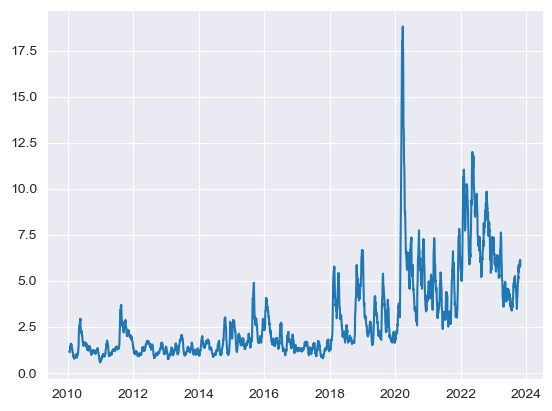

In [88]:
plt.plot(data['ATR'])

# EWMA estimated daily volatility

In [90]:
# Calculate daily returns
data['returns'] = data['Close'].pct_change()

# Calculate the volatility using exponentially weighted moving avg
# The 'span' parameter defines the degree of weighting decrease, which is set here to 100 for illustration.
span = 30
data['volatility'] = data['returns'].ewm(span=span).std()


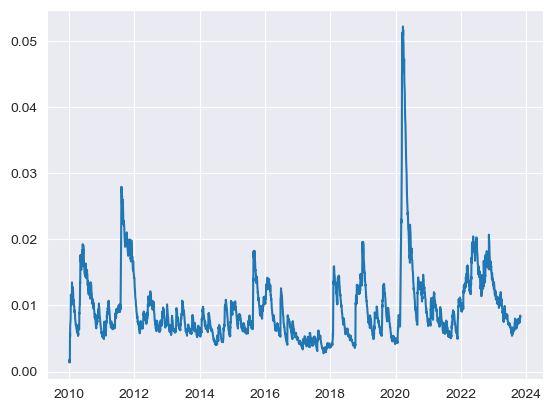

In [91]:
plt.plot(data['volatility'])